In [2]:
import pandas as pd
import numpy as np
# Data processing
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

# Similarity
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings = ratings.drop('timestamp', axis = 1)
#my_data.info()
movies = pd.read_csv('ml-latest-small/movies.csv')
df = pd.merge(ratings,movies,on='movieId')
df

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [3]:
pin = pd.DataFrame(df.groupby('title')['rating'].mean())
pin['number_of_ratings'] = df.groupby('title')['rating'].count()
pin = pin.sort_values(by='number_of_ratings',ascending=False)
pin

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


In [4]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


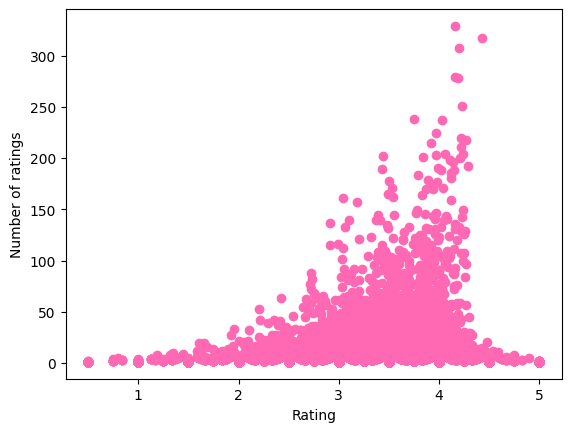

In [5]:
import matplotlib.pyplot as plt
x = pin['rating']
y = pin['number_of_ratings']
plt.scatter(x,y, color = 'hotpink')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()
# It can be noticed that movies with a higher score have a highernumber of ratings

In [6]:
#creating user-item interaction matrix 
relation_movie_user = df.pivot_table(index='userId', columns = 'title', values='rating')
relation_movie_user

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [7]:
pin.sort_values('number_of_ratings', ascending=False).head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [8]:
take_gump = relation_movie_user['Forrest Gump (1994)']
corr_gump = relation_movie_user.corrwith(take_gump)
corr_gump.head(10)

/home/tudor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/tudor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.197712
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.234095
*batteries not included (1987)             0.892710
dtype: float64

In [9]:
pd_corr_gump = pd.DataFrame(corr_gump, columns=['Correlation'])
pd_corr_gump = pd_corr_gump.dropna().head(10)
pd_corr_gump['number_of_ratings'] = pin['number_of_ratings']
pd_corr_gump
# pd_corr_gump['Forrest Gump (1994)']

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.752057,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17


In [12]:
pd_corr_gump = pd_corr_gump[pd_corr_gump['number_of_ratings']>10].sort_values(by='Correlation' , ascending= False).head(10)
#The following 6 movies might be recommanded since they have a high correlation and a high number of ratings
pd_corr_gump

,Correlation,number_of_ratings
title,,
10 Cloverfield Lane (2016),0.752057,14
101 Dalmatians (1996),0.381438,47
(500) Days of Summer (2009),0.234095,42
"'burbs, The (1989)",0.197712,17
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17
